
# Random Forests

*(Partially retrieved from https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)*

## 1. Introduction

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

The following are the basic steps involved in performing the random forest algorithm:

1. Pick N random records from the dataset.
2. Build a decision tree based on these N records.
3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

The representation of a Random Forest can be seen on the image below:

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width="800">

### Advantages of using Random Forest
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1. The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
2. This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
3. The random forest algorithm works well when you have both categorical and numerical features.
4. The random forest algorithm also works well when data has missing values or it has not been scaled well (although I have performed feature scaling in this notebook just for the purpose of demonstration).

### Disadvantages of using Random Forest
1. A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
2. Due to their complexity, they require much more time to train than other comparable algorithms.

Throughout the rest of this notebook we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems.

## 2. Implementing Random Forests with Scikit Learn

## 2.1 Random Forest for Classification

**Problem Definition**

The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

For more detailed information about this dataset, check out the UCI ML repo for this dataset (https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

**Solution**

This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For tree drawing
from sklearn import tree

%matplotlib inline

**Importing the Dataset**

Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [2]:
dataset_clf = pd.read_csv("bill_authentication.csv")

The target variable here will be the column ``Class`` which values are only:
- 0: Authentic
- 1: Fake

**Preparing the Data**

The following code divides data into attributes and labels:

In [3]:
X_clf = dataset_clf.iloc[:, 0:4]
y_clf = dataset_clf.iloc[:, 4]

The following code divides data into training and testing sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, stratify=y_clf, random_state=1)

In the code above, the ``test_size`` parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training.

**Feature Scaling**

Let's try normalize the data.

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc_clf = MinMaxScaler()
X_train_clf = sc_clf.fit_transform(X_train_clf)
X_test_clf = sc_clf.fit_transform(X_test_clf)

**Training and Making Predictions**

And again, now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code:

In [6]:
from sklearn.ensemble import RandomForestClassifier

algo_clf = RandomForestClassifier(n_estimators=2, max_depth=3, random_state=1)
model_clf = algo_clf.fit(X_train_clf, y_train_clf)

In case of classificaion, we use ``RandomForestClassifier`` class of the sklearn.ensemble library. ``RandomForestClassifier class`` takes n_estimators as a parameter. This parameter defines the number of trees in our random forest. We will start with **2 trees** and a maximum depth for each tree of **3 levels**. You can find details for all of the parameters of RandomForestClassifier here (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Now that our classifier has been trained, let's make predictions on the test data. To make predictions, the predict method of the ``RandomForestClassifier`` class is used. Take a look at the following code for usage:

In [7]:
y_pred_clf = model_clf.predict(X_test_clf)

#### Visualize the Forest

To look a little deeper into the model, we can visualize each of the trees and how they are dividing the data. This can be done by using the ``tree`` module built into Scikit-Learn, and then looping through each of the estimators in the ensemble:

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1791095845)


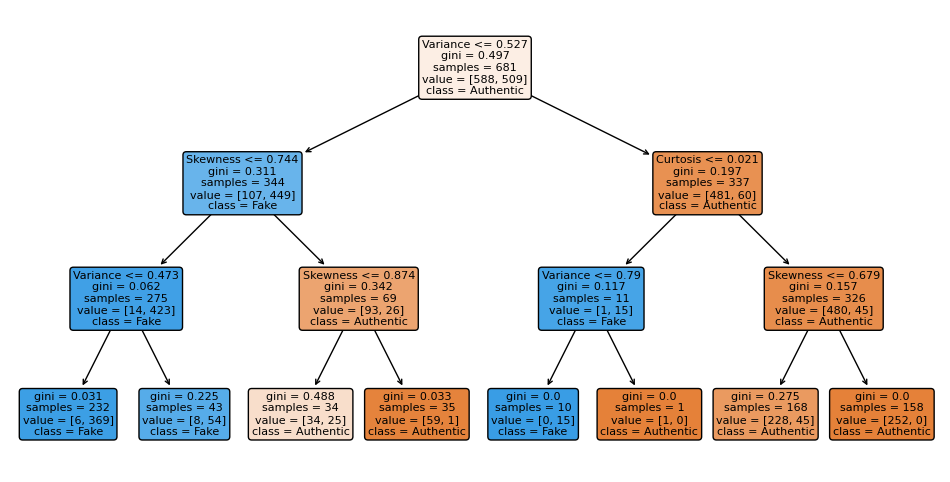

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2135392491)


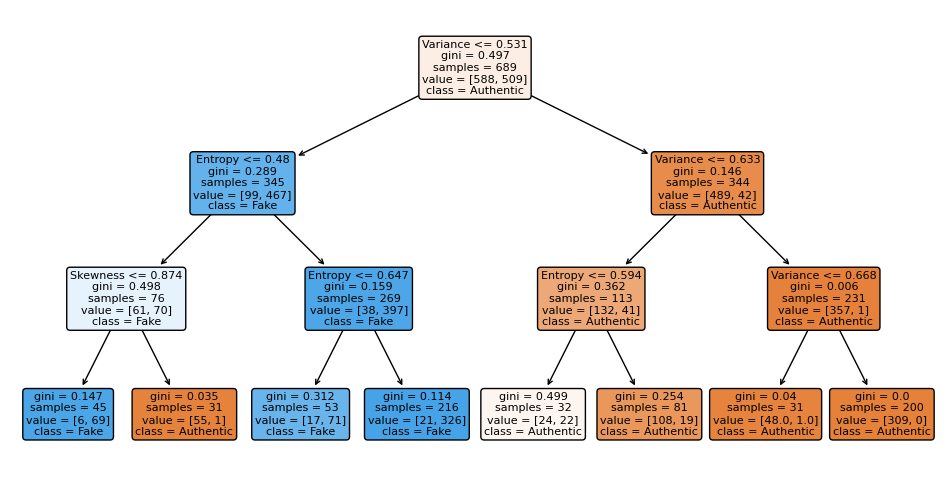

In [8]:
features = list(X_clf.columns.values)
classes_clf = ["Authentic", "Fake"]
for estimator in algo_clf.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes_clf,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

**Evaluating the Algorithm**

At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. Lucky for us Scikit=-Learn's metrics library contains the ``classification_report`` and ``confusion_matrix`` methods that can be used to calculate these metrics for us:

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test_clf, y_pred_clf, labels=[0,1])
confusion = pd.DataFrame(cm, index=['authentic', 'fake'],
                         columns=['predicted authentic','predicted fake'])
confusion

,predicted authentic,predicted fake
authentic,142,11
fake,18,104


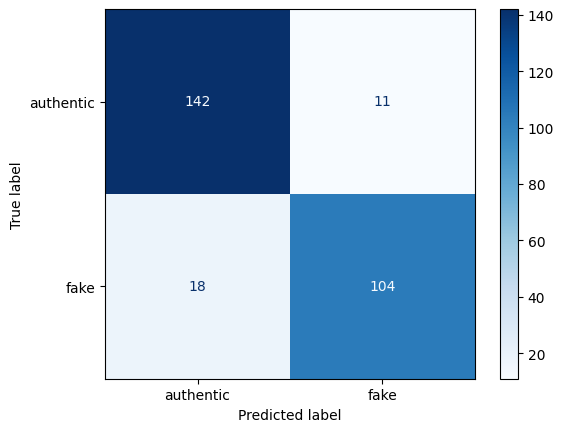

In [10]:
# NEW METHOD
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['authentic', 'fake'])
cm_fig.plot(cmap='Blues')

# ANOTHER METHOD
#import seaborn as sns
#sns.heatmap(confusion, annot=True, fmt="d")

In [11]:
print(classification_report(y_test_clf, y_pred_clf))
print(round(accuracy_score(y_test_clf, y_pred_clf), 4))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       153
           1       0.90      0.85      0.88       122

    accuracy                           0.89       275
   macro avg       0.90      0.89      0.89       275
weighted avg       0.89      0.89      0.89       275

0.8945


The accuracy achieved for by our random forest classifier with 2 trees is 89.5%. Can we improve it by **increasing the number of trees** (n_estimators)? And by increasing the **maximum depth of each tree** (max_depth)? Let's see!

Give it a try!

In [12]:
# 200 trees at 10 max depth for each tree
algo_clf_2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
model_clf_2 = algo_clf_2.fit(X_train_clf, y_train_clf)
y_pred_clf_2 = model_clf_2.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_clf_2))
print(round(accuracy_score(y_test_clf, y_pred_clf_2), 4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.98      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9891


Voilá! **~99% accuracy**! Well done!

## 2.2 Random Forest for Regression

In this section we will study how random forests can be used to solve regression problems using Scikit-Learn.

**Dataset**

We will use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

The dataset is available at this link: https://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt

**Problem Definition**

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

**Solution**

To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:

In [13]:
dataset_reg = pd.read_csv('petrol_consumption.csv')
dataset_reg.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.

To see statistical details of the dataset, execute the following command:

In [14]:
dataset_reg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


**Preparing the Data**

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

In [15]:
X_reg = dataset_reg.iloc[:, 0:4]
y_reg = dataset_reg.iloc[:, 4]

Here the ``X`` variable contains all the columns from the dataset, except ``Petrol_Consumption`` column, which is the label. The ``y`` variable contains values from the ``Petrol_Consumption`` column, which means that the ``X`` variable contains the attribute set and ``y`` variable contains the corresponding labels.

Finally, let's divide the data into training and testing sets:

In [16]:
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=1)

**Feature Scaling**

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [17]:
from sklearn.preprocessing import StandardScaler

sc_reg = StandardScaler()
X_train_reg = sc_reg.fit_transform(X_train_reg)
X_test_reg = sc_reg.transform(X_test_reg)

**Training and Making Predictions**

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following code:

In [18]:
from sklearn.ensemble import RandomForestRegressor

algo_reg = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=1)
model_reg = algo_reg.fit(X_train_reg, y_train_reg)

The ``RandomForestRegressor`` class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the ``RandomForestRegressor`` class is the ``n_estimators`` parameter. This parameter defines the number of trees in the random forest. We will start with ``n_estimator=20`` to see how our algorithm performs. You can find details for all of the parameters of ``RandomForestRegressor`` here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

To make predictions on the test set, ues the predict method:

In [19]:
y_pred_reg = model_reg.predict(X_test_reg)

**Evaluating the Algorithm**

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code to find these values:

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_reg, y_pred_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_reg, y_pred_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_reg, y_pred_reg)))
print('R2 Score', metrics.r2_score(y_test_reg, y_pred_reg))

Mean Absolute Error: 34.885000000000005
Mean Squared Error: 1762.039250000001
Root Mean Squared Error: 41.97665124804504
R2 Score 0.7805996580817713


With **20 trees** and a max depth of **10**, the **RMSE** is ~**41.98** which is slightly **lower than 10%** of the average petrol consumption i.e. 576.77. 

Can we do better with more estimators (trees)?

Let's try with **200 trees**!

In [21]:
algo_reg_2 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=1)
model_reg_2 = algo_reg_2.fit(X_train_reg, y_train_reg)
y_pred_reg_2 = model_reg_2.predict(X_test_reg)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_reg, y_pred_reg_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_reg, y_pred_reg_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_reg, y_pred_reg_2)))
print('R2 Score', metrics.r2_score(y_test_reg, y_pred_reg_2))

Mean Absolute Error: 24.960541666666654
Mean Squared Error: 1099.1530897395833
Root Mean Squared Error: 33.153477792527035
R2 Score 0.8631389376205202


Voilá! An even **lower RMSE**! And a slightly **greater than 5%** of the average petrol consumption (576.77).